**PEMROSESAN AWAL DATA**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/dataset.txt


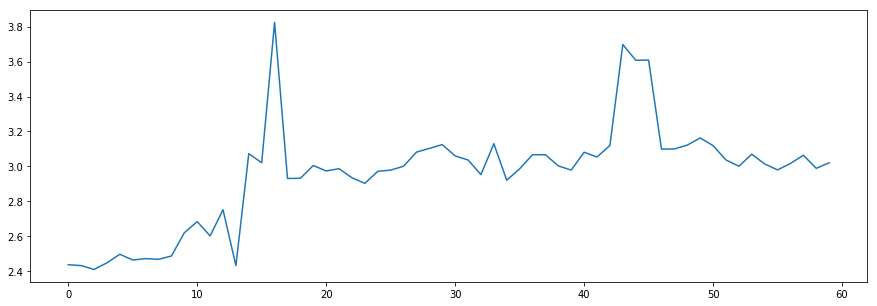

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_dataset = pd.read_csv("/kaggle/input/dataset/dataset.txt")
dates = pd.to_datetime(csv_dataset['date'])
values = csv_dataset['value']
values.to_csv('/kaggle/working/value_column.txt', index=False, header=False)
csv_dataset2 = pd.read_csv("/kaggle/working/value_column.txt")
db = csv_dataset2.iloc[:, :].values.astype('float32')
plt.figure(figsize=(15, 5))
plt.plot(values)
plt.show()

**SINGLE EXPONENTIAL SMOOTHING**

In [3]:
optimal_alpha_SES = None
best_mse_SES = None
mean_results_for_all_possible_alpha_values_SES = np.zeros(9)
for alpha_SES in range(0, 9):
    level_SES = np.mean(db[:, 0][0:5])
    mean_for_alpha_SES = np.zeros(len(db))
    mean_for_alpha_SES[0] = np.power(db[0][0] - level_SES, 2)
    for i_SES in range(1, len(db)):
        level_SES = level_SES + ((alpha_SES + 1) * 0.1) * (db[i_SES - 1][0] - level_SES)
        mean_for_alpha_SES[i_SES] = np.power(db[i_SES][0] - level_SES, 2)
    mean_results_for_all_possible_alpha_values_SES[alpha_SES] = np.mean(mean_for_alpha_SES)
optimal_alpha_SES = (np.argmin(mean_results_for_all_possible_alpha_values_SES) + 1) * 0.1
best_mse_SES = np.min(mean_results_for_all_possible_alpha_values_SES)
print("Nilai MSE Terbaik untuk SES = %s" % best_mse_SES)
print("Optimal alpha untuk SES = %s" % optimal_alpha_SES)

Nilai MSE Terbaik untuk SES = 0.039709715606
Optimal alpha untuk SES = 0.5


In [4]:
level_SES = np.mean(db[:, 0][0:5])
for i_SES in range(1, len(db) + 1):
    level_SES = level_SES + optimal_alpha_SES * (db[i_SES - 1][0] - level_SES)
print("Nilai Observasi Selanjutnya = %s" % level_SES)

Nilai Observasi Selanjutnya = 3.01730691764


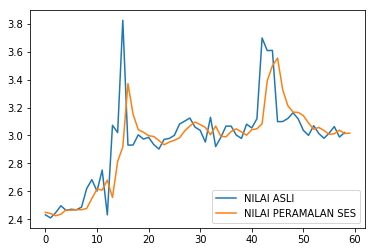

In [5]:
forecast_SES = np.zeros(len(db) + 1)
level_SES = np.mean(db[:, 0][0:5])
forecast_SES[0] = level_SES
for i_SES in range(1, len(db) + 1):
    level_SES = level_SES + optimal_alpha_SES * (db[i_SES - 1][0] - level_SES)
    forecast_SES[i_SES] = level_SES
plt.plot(db[:, 0],label = 'NILAI ASLI')
plt.plot(forecast_SES, label = 'NILAI PERAMALAN SES')
plt.legend()
plt.show()

In [6]:
forecast_12months_SES = np.zeros(12)
for i_SES in range(len(db), len(db) + 12):
    level_SES = level_SES + optimal_alpha_SES * (db[-1][0] - level_SES)
    forecast_12months_SES[i_SES - len(db)] = level_SES
print("Nilai Narapidana Selama 12 Bulan Kedepan:")
for forecast_values_SES in forecast_12months_SES:
    print(forecast_values_SES)

Nilai Narapidana Selama 12 Bulan Kedepan:
3.01915341305
3.02007666075
3.0205382846
3.02076909652
3.02088450248
3.02094220547
3.02097105696
3.0209854827
3.02099269557
3.02099630201
3.02099810523
3.02099900684


In [7]:
actual_values_SES = db[:, 0]
forecast_values_SES = forecast_SES[:len(actual_values_SES)]
mape_SES = np.mean(np.abs((actual_values_SES - forecast_values_SES) / actual_values_SES)) * 100
mape_result_SES = 100 - mape_SES
print("Nilai MAPE SES: {:.2f}%".format(mape_result_SES))

Nilai MAPE SES: 96.36%


**DOUBLE EXPONENTIAL SMOOTHING**

In [8]:
optimal_alpha_DES = None
optimal_beta_DES = None
best_mse_DES = None
mean_results_for_all_possible_alpha_beta_values_DES = np.zeros((9, 9))
for beta_DES in range(0, 9):
    for alpha_DES in range(0, 9):
        level_DES = db[0][0]
        trend_DES = db[1][0] - db[0][0]
        mean_for_alpha_beta_DES = np.zeros(len(db))
        mean_for_alpha_beta_DES[0] = np.power(db[0][0] - level_DES, 2)
        for i_DES in range(1, len(db)):
            temp_level_DES = ((alpha_DES + 1) * 0.1) * db[i_DES][0] + (1 - ((alpha_DES + 1) * 0.1)) * (level_DES + trend_DES)
            trend_DES = ((beta_DES + 1) * 0.1) * (temp_level_DES - level_DES) + (1 - ((beta_DES + 1) * 0.1)) * trend_DES
            level_DES = temp_level_DES
            mean_for_alpha_beta_DES[i_DES] = np.power(db[i_DES][0] - level_DES, 2)
        mean_results_for_all_possible_alpha_beta_values_DES[beta_DES][alpha_DES] = np.mean(mean_for_alpha_beta_DES)
        optimal_beta_DES, optimal_alpha_DES = np.unravel_index(
            np.argmin(mean_results_for_all_possible_alpha_beta_values_DES),
            np.shape(mean_results_for_all_possible_alpha_beta_values_DES))
optimal_alpha_DES = (optimal_alpha_DES + 1) * 0.1
optimal_beta_DES = (optimal_beta_DES + 1) * 0.1
best_mse_DES = np.min(mean_results_for_all_possible_alpha_beta_values_DES)
print("Nilai MSE terbaik untuk DES = %s" % best_mse_DES)
print("Optimal alpha untuk DES = %s" % optimal_alpha_DES)
print("Optimal beta untuk DES = %s" % optimal_beta_DES)

Nilai MSE terbaik untuk DES = 0.000480974214397
Optimal alpha untuk DES = 0.9
Optimal beta untuk DES = 0.1


In [9]:
level_DES = db[0][0]
trend_DES = db[1][0] - db[0][0]
for i_DES in range(1, len(db)):
    temp_level_DES = optimal_alpha_DES * db[i_DES][0] + (1 - optimal_alpha_DES) * (level_DES + trend_DES)
    trend_DES = optimal_beta_DES * (temp_level_DES - level_DES) + (1 - optimal_beta_DES) * trend_DES
    level_DES = temp_level_DES
print("Nilai Level = %s" % level_DES)
print("Nilai Trend = %s" % trend_DES)

Nilai Level = 3.01749475583
Nilai Trend = -0.00641697155716


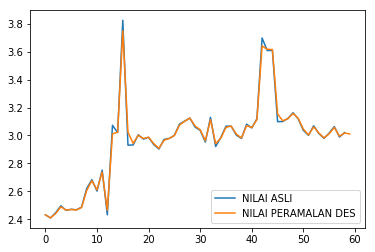

In [10]:
forecast_DES = np.zeros(len(db) + 1)
level_DES = db[0][0]
trend_DES = db[1][0] - db[0][0]
forecast_DES[0] = level_DES
for i_DES in range(1, len(db)):
    temp_level_DES = optimal_alpha_DES * db[i_DES][0] + (1 - optimal_alpha_DES) * (level_DES + trend_DES)
    trend_DES = optimal_beta_DES * (temp_level_DES - level_DES) + (1 - optimal_beta_DES) * trend_DES
    level_DES = temp_level_DES
    forecast_DES[i_DES] = level_DES
forecast_DES[-1] = level_DES + (1 * trend_DES)
plt.plot(db[:, 0],label = 'NILAI ASLI')
plt.plot(forecast_DES, label = 'NILAI PERAMALAN DES')
plt.legend()
plt.show()

In [11]:
forecast_12months_DES = np.zeros(12)
for i_DES in range(len(db), len(db) + 12):
    temp_level_DES = optimal_alpha_DES * db[-1][0] + (1 - optimal_alpha_DES) * (level_DES + trend_DES)
    trend_DES = optimal_beta_DES * (temp_level_DES - level_DES) + (1 - optimal_beta_DES) * trend_DES
    level_DES = temp_level_DES
    forecast_12months_DES[i_DES - len(db)] = level_DES
print("Nilai Narapidana Selama 12 Bulan Kedepan:")
for forecast_values_DES in forecast_12months_DES:
    print(forecast_values_DES)

Nilai Narapidana Selama 12 Bulan Kedepan:
3.02000769603
3.02034828917
3.02044099422
3.020500567
3.02055146501
3.02059691472
3.02063772913
3.02067440671
3.02070736962
3.02073699441
3.02076361915
3.02078754766


In [12]:
actual_values_DES = db[:, 0]
forecast_values_DES = forecast_DES[:len(actual_values_DES)] 
mape_DES = np.mean(np.abs((actual_values_DES - forecast_values_DES) / actual_values_DES)) * 100
mape_result_DES = 100 - mape_DES
print("Nilai MAPE DES: {:.2f}%".format(mape_result_DES))

Nilai MAPE DES: 99.63%


**TRIPLE EXPONENTIAL SMOOTHING**

In [13]:
optimal_alpha_TES = None
optimal_beta_TES = None
optimal_gamma_TES = None
best_mse_TES = None
alpha_values_TES = np.arange(0.1, 1, 0.1)
beta_values_TES = np.arange(0.1, 1, 0.1)
gamma_values_TES = np.arange(0.1, 1, 0.1)
mean_results_for_all_possible_alpha_beta_gamma_values_TES = np.zeros((len(alpha_values_TES), 
                                                                      len(beta_values_TES), len(gamma_values_TES)))
for gamma_idx_TES, gamma_TES in enumerate(gamma_values_TES):
    for beta_idx_TES, beta_TES in enumerate(beta_values_TES):
        for alpha_idx_TES, alpha_TES in enumerate(alpha_values_TES):
            level_TES = db[0][0]
            trend_TES = db[1][0] - db[0][0]
            seasonality_TES = db[2][0] - db[1][0]
            mean_for_alpha_beta_gamma_TES = np.zeros(len(db))
            mean_for_alpha_beta_gamma_TES[0] = np.power(db[0][0] - level_TES, 2)
            for i_TES in range(1, len(db)):
                temp_level_TES = (alpha_TES * db[i_TES][0]) + ((1 - alpha_TES) * (level_TES + trend_TES))
                temp_trend_TES = (beta_TES * (temp_level_TES - level_TES)) + ((1 - beta_TES) * trend_TES)
                temp_seasonality_TES = (gamma_TES * (db[i_TES][0] - temp_level_TES)) + ((1 - gamma_TES) * seasonality_TES)
                level_TES, trend_TES, seasonality_TES = temp_level_TES, temp_trend_TES, temp_seasonality_TES
                forecast_TES = temp_level_TES + temp_trend_TES + temp_seasonality_TES
                mean_for_alpha_beta_gamma_TES[i_TES] = np.power(db[i_TES][0] - forecast_TES, 2)
            mean_results_for_all_possible_alpha_beta_gamma_values_TES[alpha_idx_TES, beta_idx_TES, gamma_idx_TES] = np.mean(mean_for_alpha_beta_gamma_TES)
optimal_alpha_idx_TES, optimal_beta_idx_TES, optimal_gamma_idx_TES = np.unravel_index(
    np.argmin(mean_results_for_all_possible_alpha_beta_gamma_values_TES),
    np.shape(mean_results_for_all_possible_alpha_beta_gamma_values_TES))
optimal_alpha_TES = alpha_values_TES[optimal_alpha_idx_TES]
optimal_beta_TES = beta_values_TES[optimal_beta_idx_TES]
optimal_gamma_TES = gamma_values_TES[optimal_gamma_idx_TES]
best_mse_TES = np.min(mean_results_for_all_possible_alpha_beta_gamma_values_TES)
print("Nilai MSE terbaik untuk TES = %s" % best_mse_TES)
print("Optimal alpha untuk TES = %s" % optimal_alpha_TES)
print("Optimal beta untuk TES = %s" % optimal_beta_TES)
print("Optimal gamma untuk TES = %s" % optimal_gamma_TES)

Nilai MSE terbaik untuk TES = 0.000501680023945
Optimal alpha untuk TES = 0.8
Optimal beta untuk TES = 0.1
Optimal gamma untuk TES = 0.9


In [14]:
level_TES = db[0][0]
trend_TES = db[1][0] - db[0][0]
seasonality_TES = db[2][0] - db[1][0]
for i_TES in range(1, len(db)):
    temp_level_TES = optimal_alpha_TES * (db[i_TES][0] - seasonality_TES) + (1 - optimal_alpha_TES) * (level_TES + trend_TES)
    temp_trend_TES = optimal_beta_TES * (temp_level_TES - level_TES) + (1 - optimal_beta_TES) * trend_TES
    temp_seasonality_TES = optimal_gamma_TES * (db[i_TES][0] - temp_level_TES) + (1 - optimal_gamma_TES) * seasonality_TES
    level_TES, trend_TES, seasonality_TES = temp_level_TES, temp_trend_TES, temp_seasonality_TES
print("Nilai Level = %s" % level_TES)
print("Nilai Trend = %s" % trend_TES)
print("Nilai Seasonality = %s" % seasonality_TES)

Nilai Level = 2.9437740241
Nilai Trend = -0.00490881154043
Nilai Seasonality = 0.076454673355


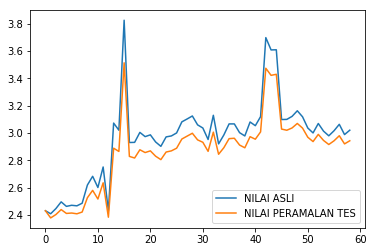

In [15]:
forecast_TES = np.zeros(len(db) + 1)
level_TES = db[0][0]
trend_TES = db[1][0] - db[0][0]
seasonality_TES = db[2][0] - db[1][0]
forecast_TES[0] = level_TES
for i_TES in range(1, len(db)):
    temp_level_TES = optimal_alpha_TES * (db[i_TES][0] - seasonality_TES) + (1 - optimal_alpha_TES) * (level_TES + trend_TES)
    temp_trend_TES = optimal_beta_TES * (temp_level_TES - level_TES) + (1 - optimal_beta_TES) * trend_TES
    temp_seasonality_TES = optimal_gamma_TES * (db[i_TES][0] - temp_level_TES) + (1 - optimal_gamma_TES) * seasonality_TES
    level_TES, trend_TES, seasonality_TES = temp_level_TES, temp_trend_TES, temp_seasonality_TES
    forecast_TES[i_TES] = level_TES
forecast_TES[-1] = level_TES + trend_TES + seasonality_TES
plt.plot(db[:, 0], label='NILAI ASLI')
plt.plot(forecast_TES[:-1], label='NILAI PERAMALAN TES')
plt.legend()
plt.show()

In [16]:
forecast_12months_TES = np.zeros(12)
level_TES = db[0][0]
trend_TES = db[1][0] - db[0][0]
seasonality_TES = db[2][0] - db[1][0]
for i_TES in range(len(db), len(db) + 12):
    temp_level_TES = optimal_alpha_TES * (db[-1][0] - seasonality_TES) + (1 - optimal_alpha_TES) * (level_TES + trend_TES)
    temp_trend_TES = optimal_beta_TES * (temp_level_TES - level_TES) + (1 - optimal_beta_TES) * trend_TES
    temp_seasonality_TES = optimal_gamma_TES * (db[-1][0] - temp_level_TES) + (1 - optimal_gamma_TES) * seasonality_TES
    level_TES, trend_TES, seasonality_TES = temp_level_TES, temp_trend_TES, temp_seasonality_TES
    forecast_12months_TES[i_TES - len(db)] = level_TES
print("Jumlah Narapidana Selama 12 Bulan Kedepan:")
for forecast_values_TES in forecast_12months_TES:
    print(forecast_values_TES)

Jumlah Narapidana Selama 12 Bulan Kedepan:
2.86840004921
2.88233608055
2.88670794746
2.89053878174
2.89405232861
2.89727844599
2.90024072539
2.90296074568
2.90545831916
2.90775163782
2.9098574059
2.91179096152


In [17]:
actual_values_TES = db[:, 0] 
forecast_values_TES = forecast_TES[:len(actual_values_TES)]
mape_TES = np.mean(np.abs((actual_values_TES - forecast_values_TES) / actual_values_TES)) * 100
mape_result_TES = 100 - mape_TES
print("Nilai MAPE TES: {:.2f}%".format(mape_result_TES))

Nilai MAPE TES: 96.72%
